In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Loading of the dataset

* Importing the train dataset into our notebook

In [2]:
df1 = pd.read_csv('train.csv')
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


* We want to see how many number of rows and columns that are in our dataset
* The results show that we have 614 rows and 13 columns in the dataset

In [3]:
df1.shape

(614, 13)

* The information which is on the dataset

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* The descriptive statistics of the dataset

In [5]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Preprocessing the data set and data cleaning

* We want to check whether our dataset has any missing values

In [6]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* The inforamtion above shows that there some missing values which are there which need to be addressed
* We need to fill the missing values using the mode of of each non-numerical column and mean for each numerical column

In [7]:
df1['Gender'].fillna(df1['Gender'].mode()[0],inplace = True)# we use the  mode function since it is a categorical variable
df1['Married'].fillna(df1['Married'].mode()[0],inplace = True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0],inplace = True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0],inplace = True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0],inplace = True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0],inplace = True)
df1.LoanAmount = df1.LoanAmount.fillna(df1.LoanAmount.mean())

In [8]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

* The dataset now does not have any missing values

## Exploratory Data Analysis

#### Categorical variable visualization

C:\Users\dtshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

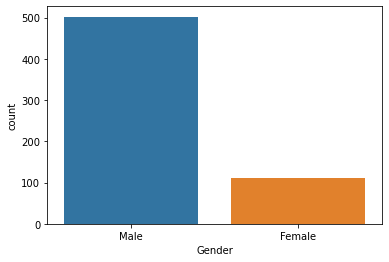

In [9]:
sns.countplot(df1['Gender'])

* The majority of the applicants in the dataset are male

C:\Users\dtshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

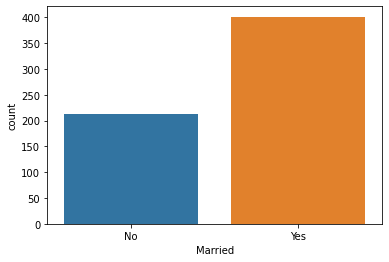

In [10]:
sns.countplot(df1['Married'])

* Most of the applicants in our dataset are married

C:\Users\dtshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

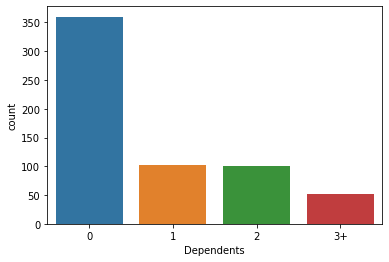

In [11]:
sns.countplot(df1['Dependents'])

* Most of the applicants in our dataset do not have any dependants 

C:\Users\dtshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

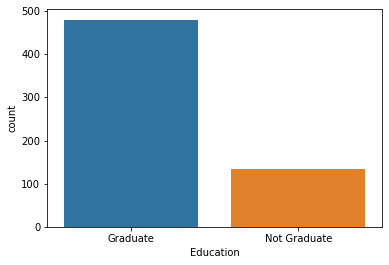

In [12]:
sns.countplot(df1['Education'])

* Majority of the applicants are graduates

C:\Users\dtshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

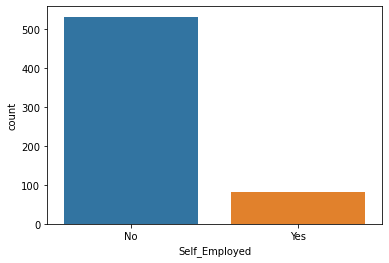

In [13]:
sns.countplot(df1['Self_Employed'])

* Most applicants are not self employed

C:\Users\dtshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

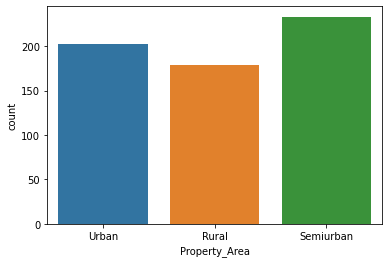

In [14]:
sns.countplot(df1['Property_Area'])

C:\Users\dtshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

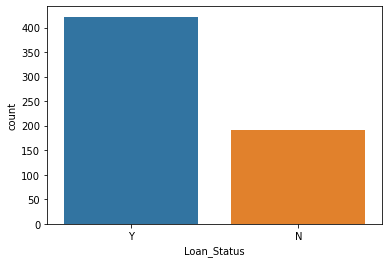

In [15]:
sns.countplot(df1['Loan_Status'])

#### Numerical Visualization

<AxesSubplot:>

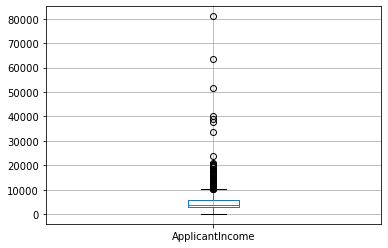

In [16]:
df1.boxplot(column = 'ApplicantIncome') 

* There are a lot of outliers which need to be handled in our dataset

<AxesSubplot:>

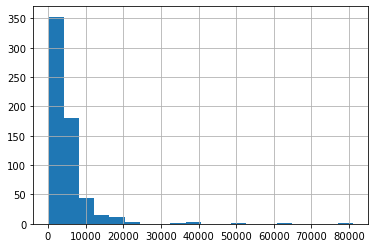

In [17]:
df1['ApplicantIncome'].hist(bins = 20)

* The dataset is right is right skewed and there is no normality in it which needs to be handled

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

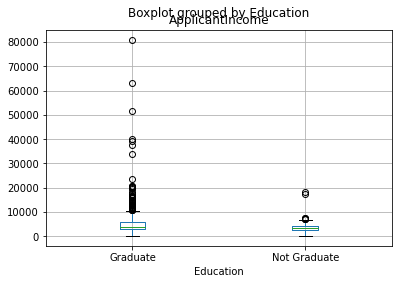

In [18]:
df1.boxplot(column = 'ApplicantIncome', by = 'Education')

* Graduates have a higher income than non graduates

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Self_Employed'>

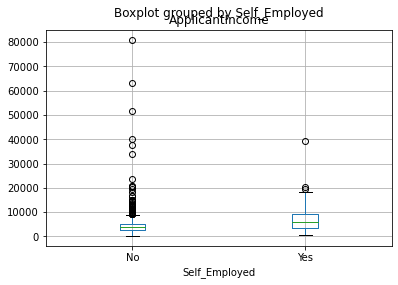

In [19]:
df1.boxplot(column = 'ApplicantIncome', by = 'Self_Employed')

* Those who are employed have a higher income than those who are not

<AxesSubplot:>

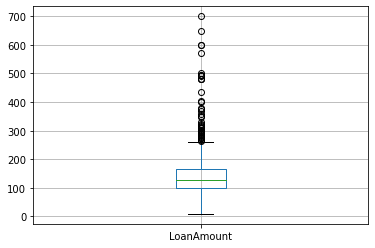

In [20]:
df1.boxplot(column = 'LoanAmount')

There are a lot of outliers in the loan amount which need to be handled

<AxesSubplot:>

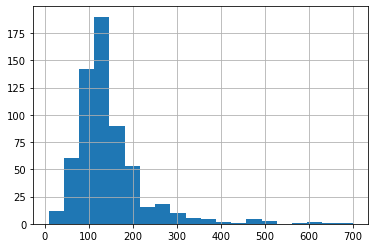

In [21]:
df1['LoanAmount'].hist(bins = 20)

* Our dataset is not normally distributed which needs to be handled

## We will normalize our dataset using the log function

<AxesSubplot:>

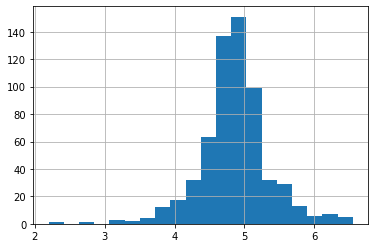

In [22]:
df1['LoanAmount_log']= np.log(df1['LoanAmount'])
df1['LoanAmount_log'].hist(bins = 20)

* The data is now normally distributed

* Since we have a new variable the LoanAmount_log we need to fill its missing values

In [23]:
df1.LoanAmount_log =df1.LoanAmount_log.fillna(df1.LoanAmount_log.mean())

* We want to add a new variable which is the total income

In [24]:
df1['TotalIncome'] = df1['ApplicantIncome']+ df1['CoapplicantIncome']
df1['TotalIncome_log'] = np.log(df1['TotalIncome'])

<AxesSubplot:>

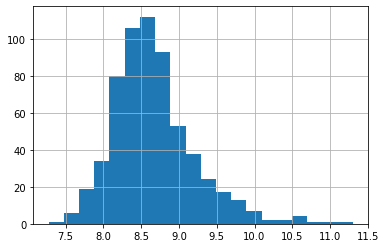

In [25]:
df1['TotalIncome_log'].hist(bins=20) 

In [26]:
df1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819


### Correlation Matrix

<AxesSubplot:>

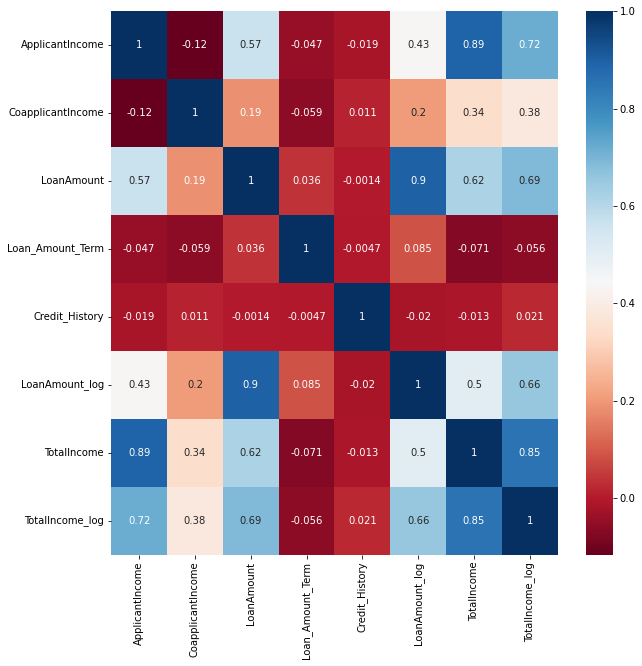

In [27]:
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap ='RdBu')
           

* With the help of the heat map we can now drop the variables which are not necessary

In [28]:
cols = ['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','TotalIncome','Loan_ID',]
df1= df1.drop(columns = cols, axis =1)

In [29]:
df1

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,Male,No,0,Graduate,No,146.412162,1.0,Urban,Y,4.986426,8.674026
1,Male,Yes,1,Graduate,No,128.000000,1.0,Rural,N,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,66.000000,1.0,Urban,Y,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,120.000000,1.0,Urban,Y,4.787492,8.505323
4,Male,No,0,Graduate,No,141.000000,1.0,Urban,Y,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.000000,1.0,Rural,Y,4.262680,7.972466
610,Male,Yes,3+,Graduate,No,40.000000,1.0,Rural,Y,3.688879,8.320205
611,Male,Yes,1,Graduate,No,253.000000,1.0,Urban,Y,5.533389,9.025456
612,Male,Yes,2,Graduate,No,187.000000,1.0,Urban,Y,5.231109,8.933664


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           614 non-null    object 
 1   Married          614 non-null    object 
 2   Dependents       614 non-null    object 
 3   Education        614 non-null    object 
 4   Self_Employed    614 non-null    object 
 5   LoanAmount       614 non-null    float64
 6   Credit_History   614 non-null    float64
 7   Property_Area    614 non-null    object 
 8   Loan_Status      614 non-null    object 
 9   LoanAmount_log   614 non-null    float64
 10  TotalIncome_log  614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


## Label Encoding

* We need to change all the categorical variables to 0 and 1 so that our model can understanda


In [31]:
from sklearn.preprocessing import LabelEncoder
cols =['Gender','Married','Self_Employed','Property_Area','Loan_Status','Dependents','Education']
le = LabelEncoder()
for col in cols:
    df1[col]= le.fit_transform(df1[col])

In [32]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,1,0,0,0,0,146.412162,1.0,2,1,4.986426,8.674026
1,1,1,1,0,0,128.000000,1.0,0,0,4.852030,8.714568
2,1,1,0,0,1,66.000000,1.0,2,1,4.189655,8.006368
3,1,1,0,1,0,120.000000,1.0,2,1,4.787492,8.505323
4,1,0,0,0,0,141.000000,1.0,2,1,4.948760,8.699515


* All categorical variables are now denoted as 0 and 1 where 0 denotes 'No' and 1 denotes 'Yes'

In [33]:
x = df1.iloc[:,np.r_[0:7,9:10]].values
y = df1.iloc[:,8].values

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25 ,random_state = 0)

In [35]:
x_train

array([[  1.        ,   1.        ,   1.        , ...,  44.        ,
          1.        ,   3.78418963],
       [  1.        ,   0.        ,   0.        , ..., 126.        ,
          1.        ,   4.83628191],
       [  1.        ,   0.        ,   2.        , ..., 162.        ,
          1.        ,   5.08759634],
       ...,
       [  1.        ,   1.        ,   3.        , ..., 200.        ,
          1.        ,   5.29831737],
       [  1.        ,   1.        ,   0.        , ..., 160.        ,
          1.        ,   5.07517382],
       [  0.        ,   1.        ,   0.        , ..., 182.        ,
          1.        ,   5.20400669]])

In [36]:
y_train

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [37]:
x_test

array([[  1.        ,   0.        ,   0.        , ...,  84.        ,
          1.        ,   4.4308168 ],
       [  0.        ,   0.        ,   0.        , ..., 112.        ,
          1.        ,   4.71849887],
       [  1.        ,   1.        ,   0.        , ..., 324.        ,
          1.        ,   5.78074352],
       ...,
       [  1.        ,   1.        ,   0.        , ..., 136.        ,
          1.        ,   4.91265489],
       [  1.        ,   0.        ,   0.        , ..., 132.        ,
          1.        ,   4.88280192],
       [  1.        ,   1.        ,   1.        , ..., 121.        ,
          0.        ,   4.79579055]])

In [38]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

### Scaling the dataset

In [39]:
from sklearn.preprocessing import StandardScaler
ds = StandardScaler()
x_train = ds.fit_transform(x_train)
x_test = ds.fit_transform(x_test)

## Implementation of the model into our data set

In [40]:
y_pred = []
len_x = len(x_train[0])
w = []
b = 0.2
print(len_x)

8


In [41]:
entries = len(x_train[:,0])
entries

460

In [42]:
for weights in range(len_x):
    w.append(0)
    
w

[0, 0, 0, 0, 0, 0, 0, 0]

In [43]:
# sigmoid function
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [44]:
def predict(inputs):
    z = np.dot(w,inputs)+b
    a = sigmoid(z)
    return a

* Cost Function

In [45]:
def loss_func(y,c):
    J = -(y*np.log(a)+(1-y)*np.log(1-a))
    return J

In [46]:
dw = []
db = 0
J = 0
alpha = 0.1
for x in range (len_x):
    dw.append(0)

* Iterations formula

In [47]:
for iterations in range (1000):
    for i in range(entries):
        localx = x_train[i]
        a = predict(localx)
        dz = a - y_train[i]
        J += loss_func(y_train[i],a)
        
        for j in range (len_x):
            dw[j] = dw[j]+(localx[j]*dz)
            db += dz
            J = J/entries
            db = db/entries
    for x in range(len_x):
        dw[x]=dw[x]/entries
    for x in range(len_x):
        w[x]=w[x]-(alpha*dw[x])
        b = b-(alpha*db)
        J=0

In [48]:
print(w)

[0.005192494069256569, 0.15585678018351054, 0.1387290777361999, -0.24189391888301923, 0.0015051499329559622, 0.16320470873184564, 1.4198041441034728, -0.38385462149728977]


In [49]:
print(b)

0.6719155387360912


In [50]:
for x in range(len(y_test)):
    y_pred.append(predict(x_test[x]))

In [51]:
for x in range(len(y_pred)):
    print('Actual', y_test[x],'Predicted', y_pred[x])
    
    if y_pred[x] >= 0.5:
        y_pred[x] = 1
    else:
        y_pred[x] = 0
        

Actual 1 Predicted 0.7841359879599717
Actual 0 Predicted 0.7520798304289431
Actual 1 Predicted 0.7463304399797824
Actual 0 Predicted 0.8098005353618524
Actual 1 Predicted 0.8591553319319915
Actual 0 Predicted 0.030055085478101966
Actual 1 Predicted 0.8469554683007773
Actual 1 Predicted 0.682965578747045
Actual 0 Predicted 0.04448109880622165
Actual 1 Predicted 0.7974506712095788
Actual 1 Predicted 0.7810661571864693
Actual 1 Predicted 0.8428849237716937
Actual 1 Predicted 0.682771577635691
Actual 1 Predicted 0.8057249433894991
Actual 1 Predicted 0.8210969629037601
Actual 0 Predicted 0.8681729244920484
Actual 0 Predicted 0.6076009464983295
Actual 1 Predicted 0.6089378095793418
Actual 1 Predicted 0.7716161699498996
Actual 0 Predicted 0.028862184291625466
Actual 0 Predicted 0.06023689194642398
Actual 1 Predicted 0.7887222129420072
Actual 1 Predicted 0.8524408071223928
Actual 1 Predicted 0.8241442158069977
Actual 1 Predicted 0.8620128720093541
Actual 1 Predicted 0.779585780105055
Actual 1 

In [52]:
count = 0
for x in range (len(y_pred)):
    if(y_pred[x]==y_test[x]):
        count=count+1
print('Accuracy',(count/(len(y_pred)))*100)

Accuracy 83.11688311688312


In [53]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[ 19  24]
 [  2 109]]


* from the confusion matrix we have 19+109 correct predictions and 24+2 wrong predictions which is far much better than the scikit library logistic regression

In [54]:
from sklearn.metrics import classification_report 
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



### Using the test data set 

In [55]:
df2 = pd.read_csv('test.csv')
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


* We want to see whether our data set has any missing values

In [56]:
df2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [57]:
df2['Gender'].fillna(df1['Gender'].mode()[0],inplace = True)# we use the  mode function since it is a categorical variable
df2['LoanAmount'].fillna(df2['LoanAmount'].mode()[0],inplace = True)
df2['Dependents'].fillna(df2['Dependents'].mode()[0],inplace = True)
df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0],inplace = True)
df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mode()[0],inplace = True)
df2['Credit_History'].fillna(df2['Credit_History'].mode()[0],inplace = True)

In [58]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:>

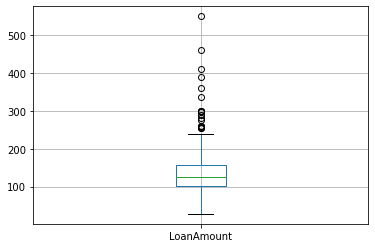

In [59]:
df2.boxplot(column = 'LoanAmount')

* There are a lot of missing values in our loan amount test data set

<AxesSubplot:>

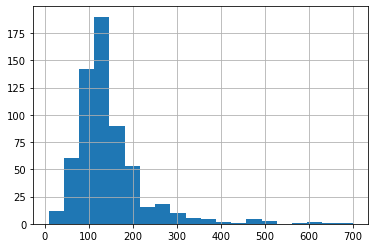

In [60]:
df1['LoanAmount'].hist(bins = 20)

* We need to normalize our loan amount test data set also using the log function like on the train data set

<AxesSubplot:>

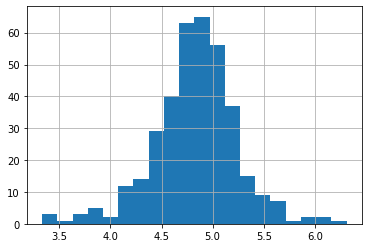

In [61]:
df2['LoanAmount_log']= np.log(df2['LoanAmount'])
df2['LoanAmount_log'].hist(bins = 20)

In [62]:
df2['TotalIncome'] = df2['ApplicantIncome']+ df2['CoapplicantIncome']
df2['TotalIncome_log'] = np.log(df2['TotalIncome'])

<AxesSubplot:>

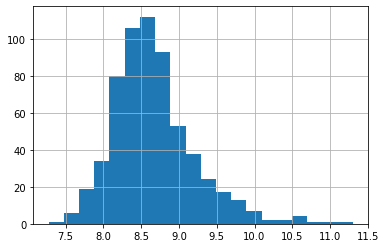

In [63]:
df1['TotalIncome_log'].hist(bins=20) 

In [64]:
cols = ['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','TotalIncome','Loan_ID',]
df2= df2.drop(columns = cols, axis =1)

In [65]:
df2

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log
0,Male,Yes,0,Graduate,No,110.0,1.0,Urban,4.700480,8.651724
1,Male,Yes,1,Graduate,No,126.0,1.0,Urban,4.836282,8.428581
2,Male,Yes,2,Graduate,No,208.0,1.0,Urban,5.337538,8.824678
3,Male,Yes,2,Graduate,No,100.0,1.0,Urban,4.605170,8.494129
4,Male,No,0,Not Graduate,No,78.0,1.0,Urban,4.356709,8.094378
...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,113.0,1.0,Urban,4.727388,8.663196
363,Male,Yes,0,Graduate,No,115.0,1.0,Urban,4.744932,8.490233
364,Male,No,0,Graduate,No,126.0,1.0,Semiurban,4.836282,8.564649
365,Male,Yes,0,Graduate,No,158.0,1.0,Rural,5.062595,8.908289


In [66]:
test = df2.iloc[:,np.r_[0:7,9:10]].values

In [67]:
for i in range (0,5):
    test[:i]=le.fit_transform(test[:,i])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int32', 'str']

In [ ]:
df3 =({ 'x':[1,4,6,8,9],
      'y':[2,8,9,12,9]
})

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.plot(df3)